# Módulo Deep Learning
## Actividad 2: Reinforcement Learning: **Frozen lake problem**

Juan Francisco Casazola Salvatierra

Ignacio Casado


# Actividad Reinforcemente Learning

Resolver el problema del Frozen lake de OpenAI Gym. Documentación: https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

## Objetivos
- Conseguir movermos aleatoriamente hasta cumplir el objetivo
- Conseguir que el agente aprenda con Q-learning
- (Opcional) Probar con otros hiperparámetros
- (Opcional) Modificar la recompensa

## Consideraciones
- No hay penalizaciones
- Si el agente cae en un "hole", entonces done = True y se queda atascado sin poder salir (al igual que ocurre cuando llega al "goal")

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**.
- Poner el nombre del grupo en el nombre del archivo y el nombre de todos los integrantes del grupo al inicio del notebook.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

## **Instalamos librerías**

In [1]:
!pip install numpy==1.24.4
!pip install gym==0.17.3

  Using cached numpy-1.24.4.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [32 lines of output]
      Traceback (most recent call last):
        File "/Users/juanfranciscocasazolasalvatierra/conda/envs/DataScience/lib/python3.13/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
          ~~~~^^
        File "/Users/juanfranciscocasazolasalvatierra/conda/envs/DataScience/lib/python3.13/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/juanfranciscocasazolasalvatierra/conda/envs/DataScience/lib/python3.13/site-packages/pip/_vendor/pyproject_hooks/_in_process/

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import clear_output
import random as rd

In [3]:
# Definimos el entorno
env = gym.make('FrozenLake-v0', desc=None, map_name="4x4", is_slippery=False)

# Fijamos una semilla
seed_value = 42
env.seed(seed_value)
np.random.seed(seed_value)
rd.seed(seed_value)

env.reset() # En este caso, empieza desde la misma posición inicial
print(env.render())
print("\nAction Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))



SFFF
FHFH
FFFH
HFFG
None

Action Space Discrete(4)
State Space Discrete(16)


In [4]:
# Movimiento aleatorio
# Hacemos un bucle en el que mediante la aleatoriedad queremos que el agente llegue a la meta sin caer en un agujero

retries = 0
success = False

while not success:
    retries += 1
    state = env.reset()
    done = False
    steps = 0

    while not done:
        clear_output(wait=True)
        env.render()
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        steps += 1
        sleep(0.3)

    if reward == 1:
        success = True
        print(f"\nFinalizado en el intento {retries} en {steps} pasos")
    else:
        print(f"\nIntento {retries} fallido (caída en un agujero).")
        sleep(0.5)

  (Right)
SFFF
FHFH
FFFH
HFFG

Finalizado en el intento 132 en 17 pasos


Con este modelo de movimiento aleatorio tardamos hasta el intento 132 y en este intento tarda 17 pasos en llegar a la meta

In [5]:
# Entrenamiento Q-Learning

# Hiperparámetros
alpha = 0.8
gamma = 0.95
epsilon = 1.0
episodes = 10000
max_steps = 100

epsilon_min = 0.1
epsilon_decay = 0.995

episode_rewards = []

# Inicializar Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Entrenamiento
for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0  

    for step in range(max_steps):
        if rd.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, info = env.step(action)

        if done and reward == 0:
            reward = -1  # Penalización por caer en un hoyo

        q_table[state, action] = q_table[state, action] + alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )
        
        total_reward += reward

        state = next_state

        if done:
            break

    episode_rewards.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

print("\nEntrenamiento completado.\n")

print("Q-table aprendida:\n", q_table)
# Acciones: 0=izquierda, 1=abajo, 2=derecha, 3=arriba
print("\nAcción preferida en el estado inicial (0):", np.argmax(q_table[0]))


Entrenamiento completado.

Q-table aprendida:
 [[ 0.73509189  0.77378094  0.6983373   0.73509189]
 [ 0.73509189 -1.          0.66340235  0.69833728]
 [ 0.69833694  0.          0.38708861  0.42369211]
 [ 0.61119254 -0.8         0.38708861  0.        ]
 [ 0.77378094  0.81450625 -1.          0.73509189]
 [ 0.          0.          0.          0.        ]
 [-0.96        0.90249983 -0.96        0.42369211]
 [ 0.          0.          0.          0.        ]
 [ 0.81450625 -1.          0.857375    0.77378094]
 [ 0.81450625  0.9025      0.9025     -1.        ]
 [ 0.857375    0.95       -1.          0.85736906]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-1.          0.9025      0.95        0.857375  ]
 [ 0.9025      0.95        1.          0.9025    ]
 [ 0.          0.          0.          0.        ]]

Acción preferida en el estado inicial (0): 1


  (Right)
SFFF
FHFH
FFFH
HFFG

Episodio terminado en 6 pasos con recompensa: 1.0

De media se ha tardado 6.00 pasos por episodio.

Éxitos: 10/10 (100.0%)


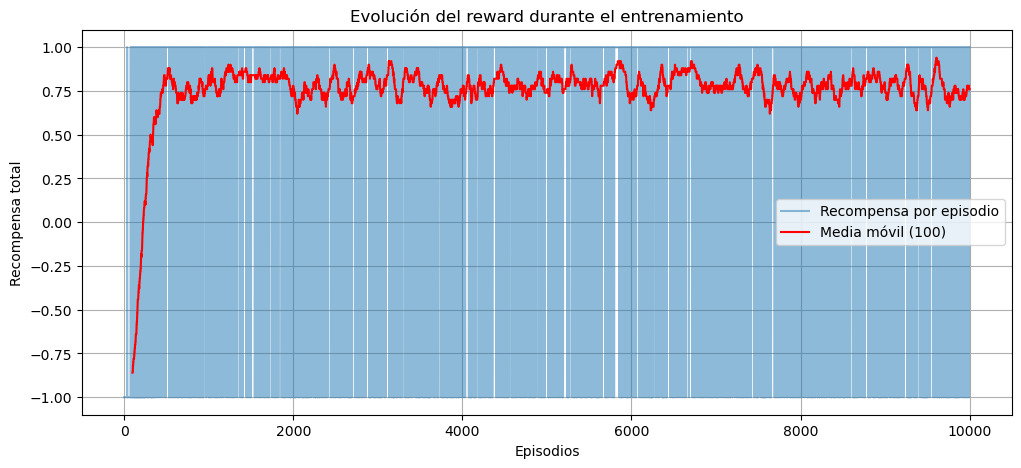

In [6]:
# Evaluación del Q-Learning
# Probaremos con 10 episodios y mostraremos los resultados

total_episodes = 10
successes = 0
results = []

for episode in range(total_episodes):
    state = env.reset()
    done = False
    steps = 0

    while not done:
        clear_output(wait=True)
        env.render()
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        steps += 1
        sleep(0.5)

    success = reward == 1
    results.append((episode + 1, steps, "Exitoso" if success else "Fallido"))

    if success:
        successes += 1

    print(f"\nEpisodio terminado en {steps} pasos con recompensa: {reward}")
    sleep(1)

print(f"\nDe media se ha tardado {np.mean([r[1] for r in results]):.2f} pasos por episodio.")
print(f"\nÉxitos: {successes}/{total_episodes} ({(successes / total_episodes) * 100:.1f}%)")

# Graficamos la recompensa por episodio
plt.figure(figsize=(12, 5))
plt.plot(episode_rewards, label='Recompensa por episodio', alpha=0.5)
# Media móvil para ver la tendencia
window = 100
if len(episode_rewards) >= window:
    rolling_mean = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
    plt.plot(range(window-1, len(episode_rewards)), rolling_mean, label=f'Media móvil ({window})', color='red')

plt.xlabel('Episodios')
plt.ylabel('Recompensa total')
plt.title('Evolución del reward durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


Al principio, el agente estaba aprendiendo y cometía muchos errores, pero rápidamente fue entendiendo cómo actuar y empezó a hacerlo cada vez mejor. Después de un tiempo, su rendimiento se volvió bastante estable y bueno, lo que muestra que ya aprendió a manejar bien la tarea.